**Notebook to model electricity price differences.**<br>

Brief summary of the exercise:
* Target: predict the price change of electricity from the Close price of one hour to the Close price of the next hour
* Input: the elementwise difference between the hourly 'candels' of the electricity price; explanation follows.

  Hourly candels refers to the Open, High, Low, Close prices and the total Volume traded within an hour; thus each hourly candel has five elements. Historically, one could reconstruct these candels for each consecutive hour. We refer to the length of history for which the candels are reconstructed as 'window_size'. Thus, for a window_size of 5, one has candels from 5 consecutive hours.
  
  Left to explain is the 'elementwise difference' remark. Out of the N window_size of history, we compute differences between the consecutive candels: Open in t minus Open in t-1, Low in t minus low in t-1, etc. Thus, from N candels we create N-1 differentiated candels.

  In this exercise, the elementwise differentiated data for window_sizes of 5 and 15 are provided

  The data is further enchanced by mostly encoded time-related information. These encode what day of the week the data correspond to, whether the day is a bank holiday or not, etc. A list will be given further below.

* ML models are to be built to predict the Target from the Input data.

In [10]:
# Load the data using the pandas library
# For the below demonstration, only the
#    * window_size of 5 files
#    * and only the training sets will be loaded here
# The validation and test sets can be similarly loaded.
# One can also use a similar kind of method for loading as was used for the download
# This can avoid the many lines of manual specification of the files. Manual is also fine, btw.

import pandas as pd
pd.set_option('display.max_columns', None)

X_train_5 = pd.read_csv('X_train_window_size_5_time_encoding_True.csv')
y_train_5 = pd.read_csv('y_train_window_size_5_time_encoding_True.csv')

# Display the first 5 rows of the predictor and the target data; for a description of the content, 
# see the text below this cell
print("Predictor data:")
display(X_train_5.head(10))
print("Target data:")
display(y_train_5.head())

Predictor data:


,total_hours,dlvry_weekend,dlvry_bank_holiday,dlvry_day_sin,dlvry_day_cos,dlvry_weekday_sin,dlvry_weekday_cos,dlvry_hour_sin,dlvry_hour_cos,lasttrade_weekend,lasttrade_bank_holiday,lasttrade_day_sin,lasttrade_day_cos,lasttrade_weekday_sin,lasttrade_weekday_cos,lasttrade_hour_sin,lasttrade_hour_cos,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,10.001383,1.0,0.0,0.201299,0.979530,-0.781831,0.62349,-0.500000,0.866025,1.0,0.0,0.201299,0.97953,-0.781831,0.62349,-0.707107,-7.071068e-01,0.03,0.80,-1.17,-1.18,92.2,600.0,-9.51,-1.98,-8.31,-2.83,176.6,540.0,5.48,2.58,5.39,5.41,187.7,480.0,4.41,-0.21,1.30,-1.31,-18.2,420.0
1,10.001383,1.0,0.0,0.201299,0.979530,-0.781831,0.62349,-0.500000,0.866025,1.0,0.0,0.201299,0.97953,-0.781831,0.62349,-0.866025,-5.000000e-01,-9.51,-1.98,-8.31,-2.83,176.6,540.0,5.48,2.58,5.39,5.41,187.7,480.0,4.41,-0.21,1.30,-1.31,-18.2,420.0,-0.31,-0.20,-0.66,-3.18,-78.3,360.0
2,10.001383,1.0,0.0,0.201299,0.979530,-0.781831,0.62349,-0.500000,0.866025,1.0,0.0,0.201299,0.97953,-0.781831,0.62349,-0.965926,-2.588190e-01,5.48,2.58,5.39,5.41,187.7,480.0,4.41,-0.21,1.30,-1.31,-18.2,420.0,-0.31,-0.20,-0.66,-3.18,-78.3,360.0,-3.49,-2.59,-7.97,-3.21,796.3,300.0
3,10.001383,1.0,0.0,0.201299,0.979530,-0.781831,0.62349,-0.500000,0.866025,1.0,0.0,0.201299,0.97953,-0.781831,0.62349,-1.000000,-1.836970e-16,4.41,-0.21,1.30,-1.31,-18.2,420.0,-0.31,-0.20,-0.66,-3.18,-78.3,360.0,-3.49,-2.59,-7.97,-3.21,796.3,300.0,-2.90,-1.69,2.44,-0.01,-355.6,240.0
4,10.001383,1.0,0.0,0.201299,0.979530,-0.781831,0.62349,-0.500000,0.866025,1.0,0.0,0.201299,0.97953,-0.781831,0.62349,-0.965926,2.588190e-01,-0.31,-0.20,-0.66,-3.18,-78.3,360.0,-3.49,-2.59,-7.97,-3.21,796.3,300.0,-2.90,-1.69,2.44,-0.01,-355.6,240.0,-0.70,-1.11,-1.11,-2.69,53.3,180.0
5,7.080482,0.0,0.0,0.394356,0.918958,0.000000,1.00000,0.258819,0.965926,1.0,0.0,0.201299,0.97953,-0.781831,0.62349,-0.707107,7.071068e-01,0.00,2.99,0.00,0.00,20.0,420.0,1.77,-1.20,0.00,0.50,40.6,360.0,-1.59,-1.09,-2.65,-2.21,555.0,300.0,-1.90,1.10,0.38,1.61,-332.7,240.0
6,7.080482,0.0,0.0,0.394356,0.918958,0.000000,1.00000,0.258819,0.965926,1.0,0.0,0.201299,0.97953,-0.781831,0.62349,-0.500000,8.660254e-01,1.77,-1.20,0.00,0.50,40.6,360.0,-1.59,-1.09,-2.65,-2.21,555.0,300.0,-1.90,1.10,0.38,1.61,-332.7,240.0,1.94,-1.58,-2.42,-2.26,421.6,180.0
7,7.726036,0.0,0.0,0.394356,0.918958,0.000000,1.00000,0.500000,0.866025,1.0,0.0,0.201299,0.97953,-0.781831,0.62349,-0.500000,8.660254e-01,-0.21,-1.00,1.26,1.26,23.1,420.0,-1.69,0.07,-0.86,-0.36,328.4,360.0,-1.39,0.63,-0.70,2.23,-86.4,300.0,3.02,-0.40,-1.93,-2.61,377.2,240.0
8,7.726036,0.0,0.0,0.394356,0.918958,0.000000,1.00000,0.500000,0.866025,1.0,0.0,0.201299,0.97953,-0.781831,0.62349,-0.258819,9.659258e-01,-1.69,0.07,-0.86,-0.36,328.4,360.0,-1.39,0.63,-0.70,2.23,-86.4,300.0,3.02,-0.40,-1.93,-2.61,377.2,240.0,-2.61,-1.70,0.23,0.49,104.2,180.0
9,8.726036,0.0,0.0,0.394356,0.918958,0.000000,1.00000,0.707107,0.707107,1.0,0.0,0.201299,0.97953,-0.781831,0.62349,-0.500000,8.660254e-01,-0.60,-1.21,-3.48,-4.60,13.0,480.0,-4.08,-1.60,-3.20,-3.20,175.2,420.0,-0.01,5.01,1.99,7.16,108.5,360.0,5.08,-2.93,-0.99,-3.26,121.3,300.0


Target data:


,y
0,-3.18
1,-3.21
2,-0.01
3,-2.69
4,2.41


**The content of the dataframe is the following:**<br>

Content of the dataframes:
* "y" - Target data
   * y: the Close price in t minus Close price in t-1 Target data
* "X" - Predictor data: various time-encoded data and the differentiated candels:
   * **<font color=red>total_hours: hours from the first trade we know for a given contract until delivery start of the same contract</font>**
   * dlvry_weekend: whether the electricity is to be delivered on a weekend
   * dlvry_bank_holiday: whether the electricity is to be delivered on a bank holiday
   * dlvry_day_sin and dlvry_day_cos: the sinus-cosinus-encoded value of the day of the delivery day (identifies a day of the week in a circular fashion)
   * dlvry_hour_sin	and dlvry_hour_cos: the sinus-cosinus-encoded value of the delivery hour (idenitifies the hour of the delivery in a circular fashion)
   * lasttrade_...: similar to the delivery time encoding, but for the most recent trading hour used as a candel
   * the numbered columns: window_size - 1 number of differentiated candels with an additional time information: the number of minutes left until delivery start. Example for window_size of 5 follows. Column 0: **<font color=red>Open</font>** in t-3 minus Open in t-4; Column 1: **<font color=red>High</font>** in t-3 minus High in t-4; Column 2: similar for **<font color=red>Low</font>**; Column 3: similar for **<font color=red>Close</font>**; Column 4: similar for **<font color=red>Volume</font>**; Column 5: **<font color=red>minutes left until the delivery start in candel for t-3</font>**; Column 6: Open in t-2 minus Open in t-3; ...; Column 23: minutes left until the delivery start in candel for t

In [11]:
X_train_5['5'].describe()

count    91512.000000
mean       789.619066
std        325.538011
min        360.000000
25%        540.000000
50%        720.000000
75%       1020.000000
max       1860.000000
Name: 5, dtype: float64

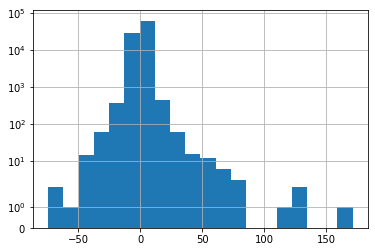

In [12]:
# Plot various aspect of the data to get familiar with it
import matplotlib.pyplot as plt
y_train_5["y"].hist(bins = 20)
plt.yscale("symlog")
plt.show()

### Data Exploration

In [13]:
import math

df = X_train_5.copy()
df['hours_int'] = df.apply(lambda row: math.floor(row.total_hours), axis=1)
df[['total_hours', 'hours_int', '5']].head(15)

,total_hours,hours_int,5
0,10.001383,10,600.0
1,10.001383,10,540.0
2,10.001383,10,480.0
3,10.001383,10,420.0
4,10.001383,10,360.0
5,7.080482,7,420.0
6,7.080482,7,360.0
7,7.726036,7,420.0
8,7.726036,7,360.0
9,8.726036,8,480.0


### Confirm relationship between `total_hours` and column `5` of the first record of every contract (i.e., the highest number of minutes left until the delivery start)

In [7]:
# It is reasonable to assume that after the unrolling was done,
# all relevant rows of the same contract are located next to
# each other. Using two conditions we should be able to identify the
# next contract has occurred: (1) The total_hours value has changed, and;
# (2) The opening price difference is different (if it's the record of the
# same contract, last row's column 6 should be the same as this current
# row's column 0 due to the unrolling).
count = 1
hour = df.iloc[0,:]['total_hours']

for i in range(1, len(df)):
    if df.iloc[i,:]['total_hours']==hour and df.iloc[i,:]['0']==df.iloc[i-1,:]['6']:
        continue
    else:
        hour = df.iloc[i,:]['total_hours']
        subset = df.loc[df.total_hours==hour]
        longest_min = subset['5'].max()
        if (df.iloc[i,:]['hours_int']*60) != longest_min:
            print(f'Mismatch in row {i}!')
        count += 1
        
print(f'Number of contracts is {count}.')

Number of contracts is 7830.


#### Note: no "mismatch" statement has been printed, i.e., the assumption is correct.
#### It also indicates that simply using the unique values (which is 7780 as printed below) of `total_hours` is not reliable.

In [8]:
print(f'Number of unique values in the total_hours column is {len(df.total_hours.unique())}')

Number of unique values in the total_hours column is 7780.


### For datasets with window size of 15:

In [16]:
X_train_15 = pd.read_csv('X_train_window_size_15_time_encoding_True.csv')
y_train_15 = pd.read_csv('y_train_window_size_15_time_encoding_True.csv')

In [17]:
display(X_train_15.shape)
X_train_15.head(5)

(29888, 101)

,total_hours,dlvry_weekend,dlvry_bank_holiday,dlvry_day_sin,dlvry_day_cos,dlvry_weekday_sin,dlvry_weekday_cos,dlvry_hour_sin,dlvry_hour_cos,lasttrade_weekend,lasttrade_bank_holiday,lasttrade_day_sin,lasttrade_day_cos,lasttrade_weekday_sin,lasttrade_weekday_cos,lasttrade_hour_sin,lasttrade_hour_cos,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83
0,16.367966,0.0,0.0,0.394356,0.918958,0.0,1.0,2.588190e-01,-0.965926,0.0,0.0,0.394356,0.918958,0.0,1.0,0.866025,-0.500000,1.90,0.00,1.30,-1.80,-0.8,960.0,-0.60,-0.90,-0.71,-0.71,6.4,900.0,-1.20,-1.20,-0.04,0.41,-3.6,840.0,0.00,0.00,0.45,0.00,-10.2,780.0,-0.01,-0.01,-0.27,-0.27,4.3,720.0,0.06,0.06,0.32,0.32,-3.9,660.0,-0.13,0.15,-0.13,0.13,87.4,600.0,0.97,0.73,-0.19,0.43,46.3,540.0,-0.27,0.17,0.44,-0.44,-13.1,480.0,0.05,0.00,-0.08,0.34,176.7,420.0,-0.56,-0.01,-1.87,-1.31,46.7,360.0,-0.42,-1.40,-2.61,-2.40,502.4,300.0,-2.89,-1.80,0.19,0.48,-202.3,240.0,0.47,0.65,0.40,-0.28,890.7,180.0
1,17.549852,0.0,0.0,0.394356,0.918958,0.0,1.0,1.224647e-16,-1.000000,0.0,0.0,0.394356,0.918958,0.0,1.0,0.866025,-0.500000,-2.90,2.00,-2.90,-1.40,1.0,1020.0,3.50,0.00,0.50,-2.20,5.1,960.0,-3.80,-5.30,-1.10,0.20,-9.7,900.0,1.00,-0.30,0.96,-0.44,-8.2,840.0,-0.12,0.24,-0.02,0.58,50.4,780.0,0.60,0.24,0.84,0.24,-48.3,720.0,0.00,0.61,-0.01,0.61,84.3,660.0,0.81,0.35,-0.02,0.13,-1.4,600.0,0.20,0.05,0.35,-0.42,15.0,540.0,-0.16,0.11,-0.10,-0.10,340.6,480.0,-0.73,-0.50,-1.30,-1.30,-169.8,420.0,-1.20,-0.50,-3.45,-1.81,263.3,360.0,-1.81,-2.66,-0.50,-0.99,188.3,300.0,-1.00,0.66,0.66,-0.49,107.5,240.0
2,17.549852,0.0,0.0,0.394356,0.918958,0.0,1.0,1.224647e-16,-1.000000,0.0,0.0,0.394356,0.918958,0.0,1.0,0.707107,-0.707107,3.50,0.00,0.50,-2.20,5.1,960.0,-3.80,-5.30,-1.10,0.20,-9.7,900.0,1.00,-0.30,0.96,-0.44,-8.2,840.0,-0.12,0.24,-0.02,0.58,50.4,780.0,0.60,0.24,0.84,0.24,-48.3,720.0,0.00,0.61,-0.01,0.61,84.3,660.0,0.81,0.35,-0.02,0.13,-1.4,600.0,0.20,0.05,0.35,-0.42,15.0,540.0,-0.16,0.11,-0.10,-0.10,340.6,480.0,-0.73,-0.50,-1.30,-1.30,-169.8,420.0,-1.20,-0.50,-3.45,-1.81,263.3,360.0,-1.81,-2.66,-0.50,-0.99,188.3,300.0,-1.00,0.66,0.66,-0.49,107.5,240.0,-0.38,6.03,-2.01,-0.53,1169.5,180.0
3,19.078845,0.0,0.0,0.394356,0.918958,0.0,1.0,-2.588190e-01,-0.965926,0.0,0.0,0.394356,0.918958,0.0,1.0,0.965926,-0.258819,2.59,5.69,2.59,5.69,10.7,1140.0,3.69,0.59,1.00,-2.10,8.7,1080.0,-0.30,-0.30,-1.30,-1.30,1.2,1020.0,-3.59,-3.19,0.00,0.50,65.9,960.0,0.40,0.00,0.50,0.00,-90.5,900.0,-1.00,-1.00,-1.00,-1.00,5.1,840.0,0.49,0.49,0.49,0.49,-0.4,780.0,-0.02,-0.01,-0.03,-0.03,-0.3,720.0,-0.01,-0.02,0.00,0.00,-4.4,660.0,0.03,0.03,-0.77,-0.77,62.7,600.0,-0.62,1.71,-0.52,1.80,141.3,540.0,1.08,-0.99,-0.13,-0.53,14.4,480.0,-0.94,-1.01,-2.84,-3.71,18.8,420.0,-2.51,-2.50,0.30,0.45,321.4,360.0
4,19.078845,0.0,0.0,0.394356,0.918958,0.0,1.0,-2.588190e-01,-0.965926,0.0,0.0,0.394356,0.918958,0.0,1.0,0.866025,-0.500000,3.69,0.59,1.00,-2.10,8.7,1080.0,-0.30,-0.30,-1.30,-1.30,1.2,1020.0,-3.59,-3.19,0.00,0.50,65.9,960.0,0.40,0.00,0.50,0.00,-90.5,900.0,-1.00,-1.00,-1.00,-1.00,5.1,840.0,0.49,0.49,0.49,0.49,-0.4,780.0,-0.02,-0.01,-0.03,-0.03,-0.3,720.0,-0.01,-0.02,0.00,0.00,-4.4,660.0,0.03,0.03,-0.77,-0.77,62.7,600.0,-0.62,1.71,-0.52,1.80,141.3,540.0,1.08,-0.99,-0.13,-0.53,14.4,480.0,-0.94,-1.01,-2.84,-3.71,18.8,420.0,-2.51,-2.50,0.30,0.45,321.4,360.0,-0.06,1.40,0.93,0.30,-79.6,300.0


In [18]:
df2 = X_train_15.copy()
df2['hours_int'] = df2.apply(lambda row: math.floor(row.total_hours), axis=1)

count = 1
hour = df2.iloc[0,:]['total_hours']

for i in range(1, len(df2)):
    if df2.iloc[i,:]['total_hours']==hour and df2.iloc[i,:]['0']==df2.iloc[i-1,:]['6']:
        continue
    else:
        hour = df2.iloc[i,:]['total_hours']
        subset = df2.loc[df2.total_hours==hour]
        longest_min = subset['5'].max()
        if (df2.iloc[i,:]['hours_int']*60) != longest_min:
            print(f'Mismatch in row {i}!')
        count += 1
        
print(f'Number of contracts is {count}.')

Number of contracts is 4423.


In [19]:
print(f'Number of unique values in the total_hours column is {len(df2.total_hours.unique())}')

Number of unique values in the total_hours column is 4398


#### Priliminary model training
**Perhaps we can make use of the feature importance analysis here.**

In [24]:
X_train_5 = pd.read_csv('X_train_window_size_5_time_encoding_True.csv')
y_train_5 = pd.read_csv('y_train_window_size_5_time_encoding_True.csv')

X_test_5 = pd.read_csv('X_test_window_size_5_time_encoding_True.csv')
y_test_5 = pd.read_csv('y_test_window_size_5_time_encoding_True.csv')

X_valid_5 = pd.read_csv('X_valid_window_size_5_time_encoding_True.csv')
y_valid_5 = pd.read_csv('y_valid_window_size_5_time_encoding_True.csv')

In [22]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(nthreads = -1, port="8080")

Checking whether there is an H2O instance running at http://localhost:8080 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "15.0.1" 2020-10-20; Java(TM) SE Runtime Environment (build 15.0.1+9-18); Java HotSpot(TM) 64-Bit Server VM (build 15.0.1+9-18, mixed mode, sharing)
  Starting server from /Applications/anaconda3/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/bb/sgrdbysn0cbby831z71f1yhw0000gn/T/tmpn37c5eui
  JVM stdout: /var/folders/bb/sgrdbysn0cbby831z71f1yhw0000gn/T/tmpn37c5eui/h2o_aayushmarishi_started_from_python.out
  JVM stderr: /var/folders/bb/sgrdbysn0cbby831z71f1yhw0000gn/T/tmpn37c5eui/h2o_aayushmarishi_started_from_python.err
  Server is running at http://127.0.0.1:8080
Connecting to H2O server at http://127.0.0.1:8080 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/Berlin
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.4
H2O_cluster_version_age:,3 months and 6 days
H2O_cluster_name:,H2O_from_python_aayushmarishi_6uj3l0
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2 Gb
H2O_cluster_total_cores:,6
H2O_cluster_allowed_cores:,6
H2O_cluster_status:,"accepting new members, healthy"


In [36]:
def run(seed, train, test): 
    
    ##  set up h2o
    h2o_train = h2o.H2OFrame(train)
    h2o_test = h2o.H2OFrame(test)

    x = list(h2o_train.columns)
    aml = H2OAutoML(seed=seed, max_runtime_secs = 600, exclude_algos = ['DeepLearning'],
                    sort_metric = 'MSE')
    aml.train(x=x, y='y', training_frame=h2o_train)
    
    ## predict
    y_hat = aml.leader.predict(h2o_test) 
    y_pred = y_hat.as_data_frame()
    test_df = h2o_test.as_data_frame()
    predictions = pd.concat([test_df, y_pred], axis=1)

    return predictions, aml

In [78]:
h2o_train_5 = pd.concat([X_train_5, y_train_5], axis=1)
h2o_test_5 = pd.concat([X_test_5, y_test_5], axis=1)
h2o_valid_5 = pd.concat([X_test_5, y_test_5], axis=1)

In [37]:
pred, aml = run(10, h2o_train_5, h2o_test_5) 

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%


In [38]:
aml.leaderboard.head(15)

model_id,mse,mean_residual_deviance,rmse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20211015_102419,10.4248,10.4248,3.22874,1.74924,nan
StackedEnsemble_BestOfFamily_AutoML_20211015_102419,10.4858,10.4858,3.23817,1.75277,nan
GBM_grid__1_AutoML_20211015_102419_model_6,10.6564,10.6564,3.26441,1.75707,nan
GBM_grid__1_AutoML_20211015_102419_model_7,10.7829,10.7829,3.28373,1.75945,nan
GBM_grid__1_AutoML_20211015_102419_model_5,10.915,10.915,3.30378,1.76891,nan
XRT_1_AutoML_20211015_102419,10.932,10.932,3.30636,1.76477,nan
GBM_1_AutoML_20211015_102419,10.9767,10.9767,3.31311,1.768,nan
DRF_1_AutoML_20211015_102419,11.1896,11.1896,3.34509,1.76747,nan
GBM_3_AutoML_20211015_102419,11.2571,11.2571,3.35515,1.7731,nan
XGBoost_grid__1_AutoML_20211015_102419_model_3,11.2689,11.2689,3.35691,1.80198,nan


In [50]:
labels = ["open", "high", "low", "close", "volume", "minutes"]
new_cols = []
for i in range(4, 0, -1):
    for label in labels:
        if label != 'minutes':
            new_cols.append(label+f"_{i}_{i-1}")
        else:
            new_cols.append(label+f"_{i-1}")
name_map = dict(zip(list(X_train_5.columns[17:]), new_cols))

In [52]:
lb = aml.leaderboard

m = h2o.get_model(lb[2,"model_id"])
a = m.varimp(use_pandas=True)
a.replace({'variable': name_map}, inplace=True)
a

,variable,relative_importance,scaled_importance,percentage
0,close_1_0,241070.359375,1.000000,0.088846
1,high_1_0,159086.875000,0.659919,0.058631
2,close_2_1,158268.656250,0.656525,0.058329
3,open_1_0,154400.828125,0.640480,0.056904
4,lasttrade_hour_sin,108674.093750,0.450798,0.040052
5,open_2_1,103314.265625,0.428565,0.038076
6,close_3_2,101866.171875,0.422558,0.037542
7,dlvry_day_cos,101091.976562,0.419346,0.037257
8,lasttrade_hour_cos,94753.843750,0.393055,0.034921
9,low_1_0,90490.156250,0.375368,0.033350


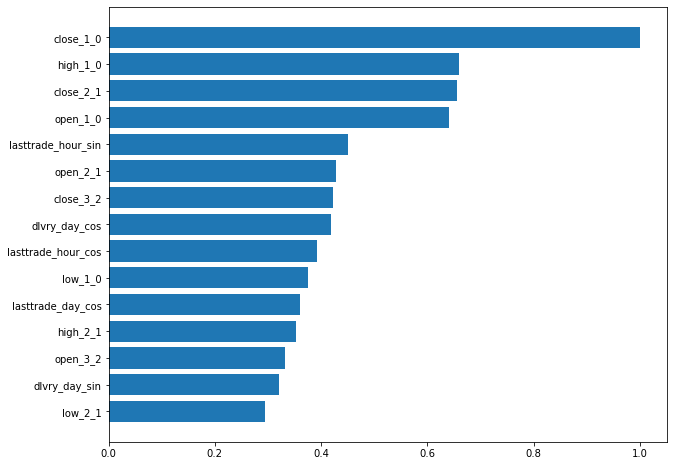

In [68]:
# m.varimp_plot(num_of_features = 15)
plt.rcParams["figure.figsize"] = (10,8)
plt.barh(a.variable[:15], a.scaled_importance[:15])
plt.gca().invert_yaxis()
plt.show()

train_df_5 = X_train_5.drop(['5', '11', '17', '23'], axis=1).to_numpy()
test_df_5 = X_test_5.drop(['5', '11', '17', '23'], axis=1).to_numpy()
valid_df_5 = X_valid_5.drop(['5', '11', '17', '23'], axis=1).to_numpy()

In [75]:
h2o_test = h2o.H2OFrame(h2o_test_5)
perf = aml.leader.model_performance(h2o_test)
perf

Parse progress: |█████████████████████████████████████████████████████████| 100%

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 23.795879733313086
RMSE: 4.878102062617498
MAE: 2.3818586932144803
RMSLE: NaN
R^2: -0.12467157550805585
Mean Residual Deviance: 23.795879733313086
Null degrees of freedom: 10703
Residual degrees of freedom: 10697
Null deviance: 226484.8421616428
Residual deviance: 254711.09666538326
AIC: 64319.09733270877


In [80]:
h2o_train = h2o.H2OFrame(h2o_train_5)
aml.leader.model_performance(h2o_train)

Parse progress: |█████████████████████████████████████████████████████████| 100%

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 5.9458752633380945
RMSE: 2.4384165483645517
MAE: 1.5090575646982134
RMSLE: NaN
R^2: 0.5007538634599228
Mean Residual Deviance: 5.9458752633380945
Null degrees of freedom: 91511
Residual degrees of freedom: 91505
Null deviance: 1089881.1172971549
Residual deviance: 544118.9370985957
AIC: 422854.0422430853


In [81]:
h2o_valid = h2o.H2OFrame(h2o_valid_5)
aml.leader.model_performance(h2o_valid)

Parse progress: |█████████████████████████████████████████████████████████| 100%

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 28.54374853488344
RMSE: 5.342634980501985
MAE: 2.6743226244309395
RMSLE: NaN
R^2: -0.11105005644394161
Mean Residual Deviance: 28.54374853488344
Null degrees of freedom: 4816
Residual degrees of freedom: 4810
Null deviance: 123795.17425196664
Residual deviance: 137495.23669253354
AIC: 29829.930417773754
